In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
plt.style.use('default')

In [6]:
import pandas as pd
#используем объединенный датасет о заболеваемости и вакцинации
covid_df = pd.read_csv('data/covid_df.csv') 
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df.head()

,Unnamed: 0,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


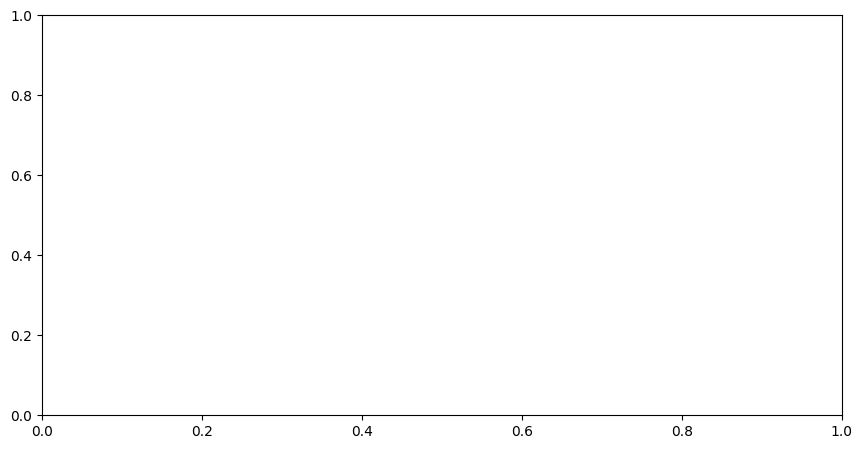

In [7]:
fig = plt.figure(figsize=(8,4))
axes = fig.add_axes([0,0,1,1])

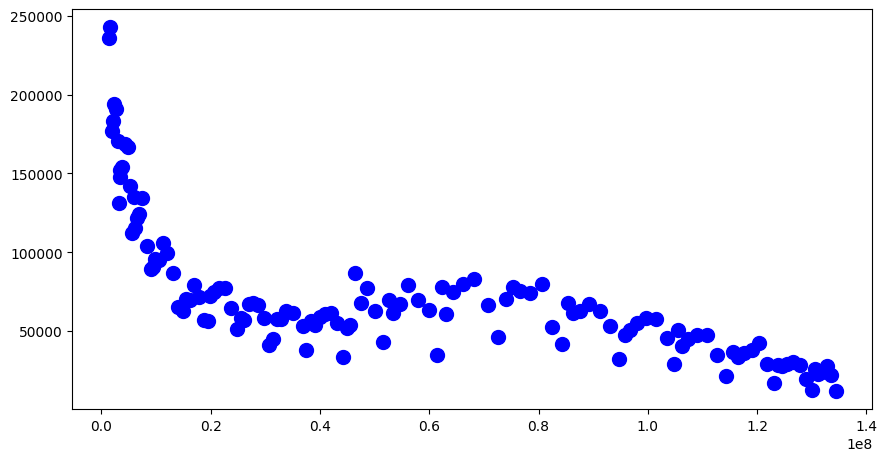

In [8]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8,4))
axes = fig.add_axes([0,0,1,1])
axes.scatter(
    x = us_data['people_fully_vaccinated'],
    y = us_data['daily_confirmed'],
    s=100,
    marker = 'o',
    c= 'blue'
);

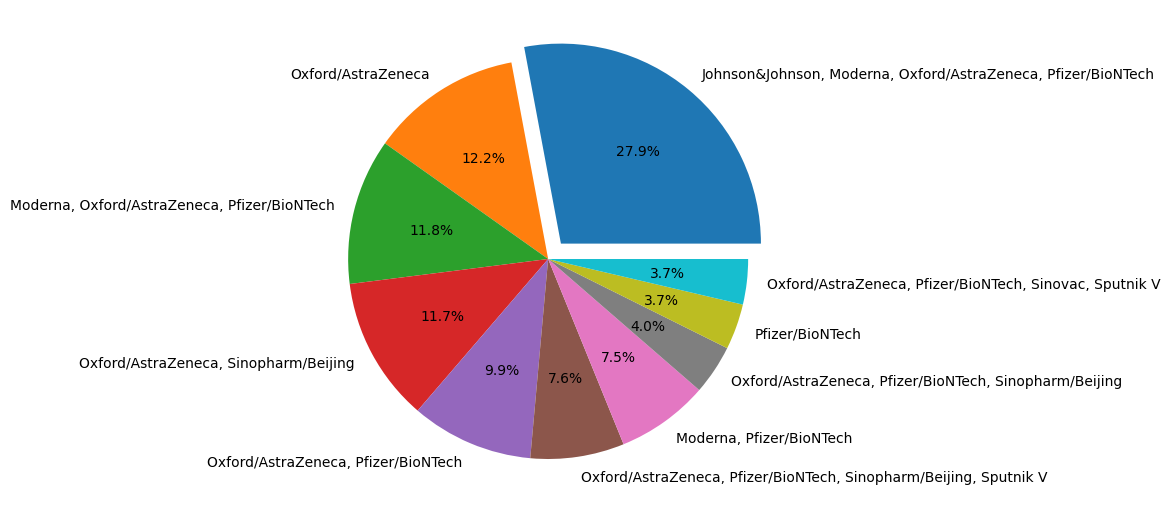

In [9]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    vaccine_combinations,
    labels = vaccine_combinations.index,
    autopct = '%.1f%%',
    explode = [0.1,0,0,0,0,0,0,0,0,0]
);

In [10]:
combination_not_nan = covid_df.dropna(subset=['vaccines'])

In [11]:
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last()

In [12]:
display(combination_last)

country
Afghanistan    Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...
Albania        Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...
Algeria         Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V
Andorra                      Oxford/AstraZeneca, Pfizer/BioNTech
Angola                                        Oxford/AstraZeneca
                                     ...                        
Venezuela          Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V
Vietnam        Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...
Yemen                                         Oxford/AstraZeneca
Zambia                     Oxford/AstraZeneca, Sinopharm/Beijing
Zimbabwe       Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...
Name: vaccines, Length: 174, dtype: object

In [13]:
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(','))

In [14]:
vaccines_dict = {}
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество

In [15]:
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]

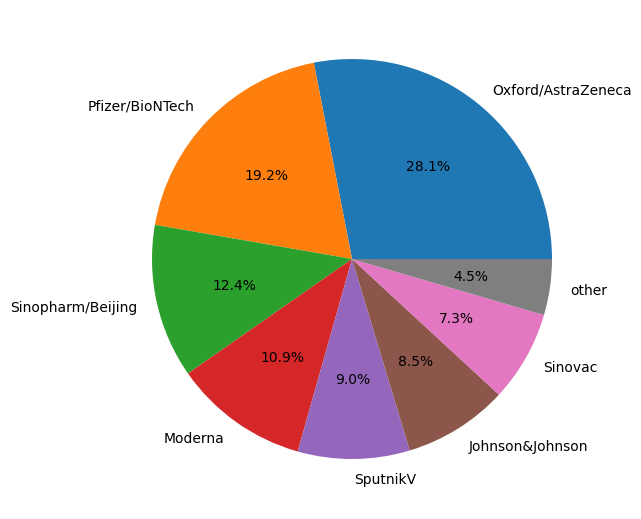

In [16]:
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
vaccines,
labels=vaccines.index,
autopct='%.1f%%',
);

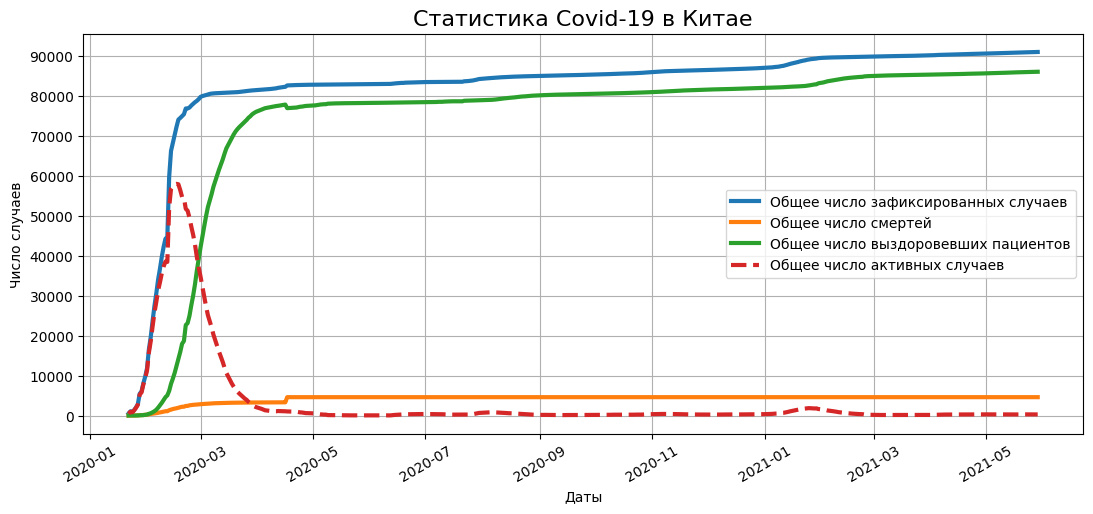

In [17]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered' ]].sum()
#визуализация графиков
fig = plt.figure(figsize=(10,4))
axes = fig.add_axes([0,0,1,1])
axes.plot(china_grouped['confirmed'], label = 'Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')
#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

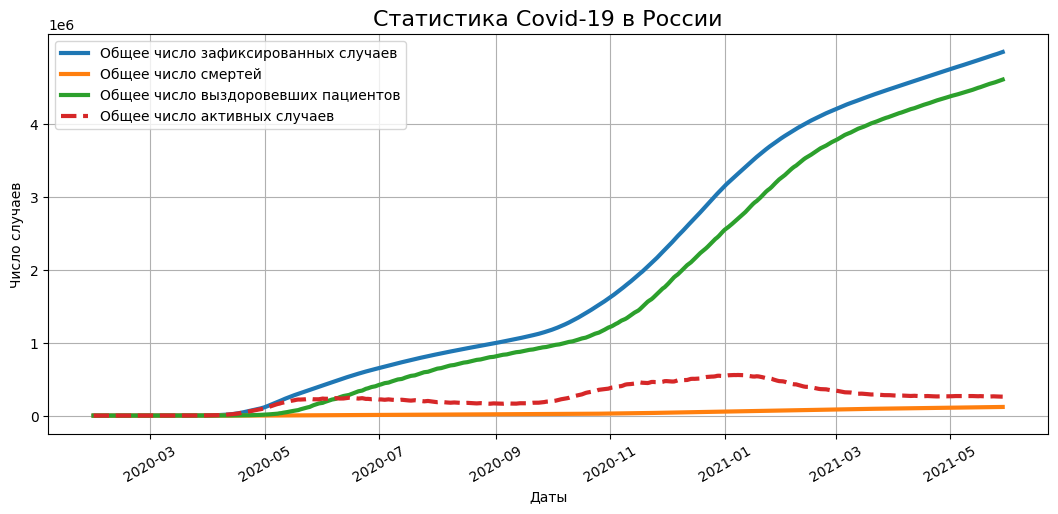

In [18]:
rus_data = covid_df[covid_df['country'] == 'Russia']
rus_grouped = rus_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered' ]].sum()
#визуализация графиков
fig = plt.figure(figsize=(10,4))
axes = fig.add_axes([0,0,1,1])
axes.plot(rus_grouped['confirmed'], label = 'Общее число зафиксированных случаев', lw=3)
axes.plot(rus_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(rus_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(rus_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')
#установка параметров отображения
axes.set_title('Статистика Covid-19 в России', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 5000000, 1000000)) #странно, правда?
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

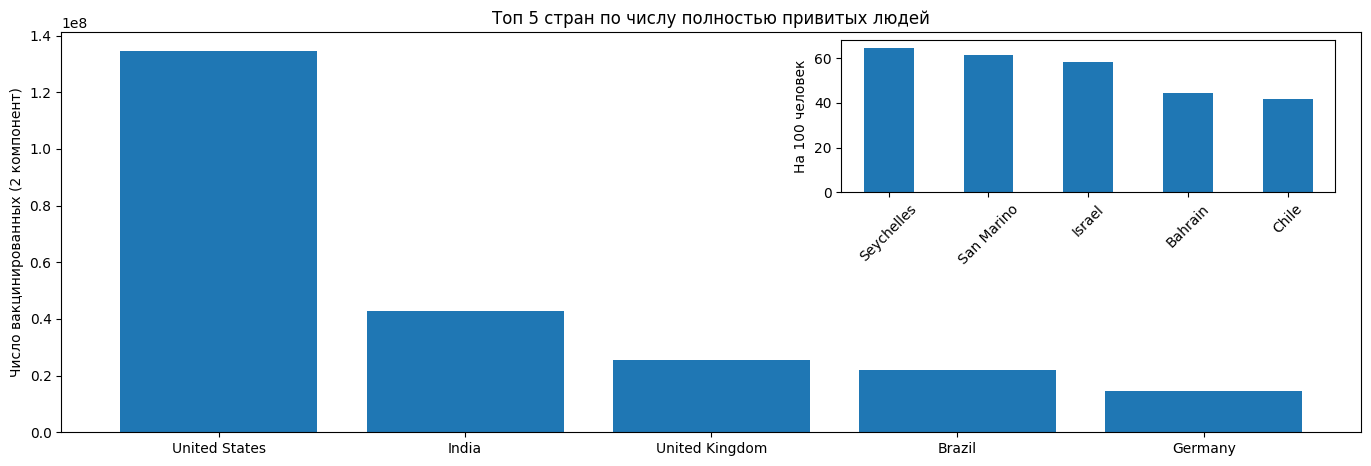

In [19]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest()
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)
#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0,0,1,1])
main_axes.bar(x=vacc_country.index,height=vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)');
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')
#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6,0.6,0.38,0.38])
insert_axes.bar(x = vacc_country_per_hundred.index, height=vacc_country_per_hundred,width = 0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

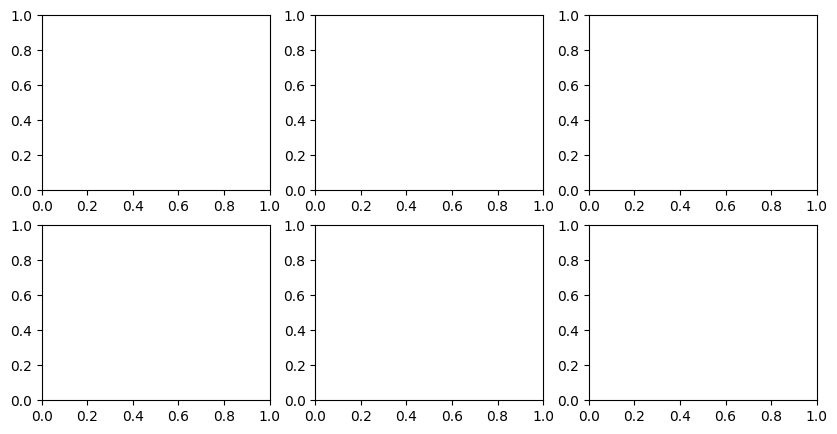

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,5))

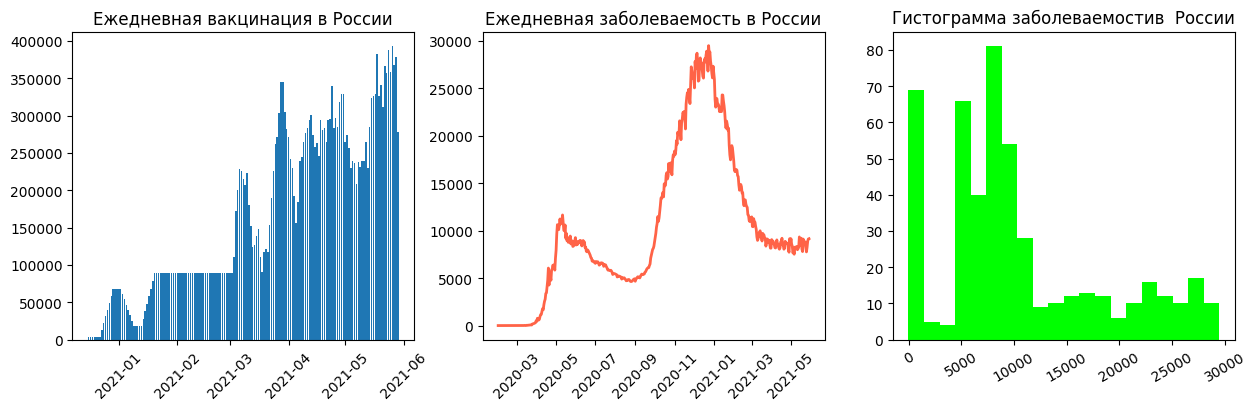

In [21]:
russia_data = covid_df[covid_df['country'] == 'Russia']
# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
# столбчатая диаграмма
axes[0].bar(
    x = russia_data["date"],
    height = russia_data["daily_vaccinations"],
    label="Число вакцинированных",
)
axes[0].set_title("Ежедневная вакцинация в России")
axes[0].xaxis.set_tick_params(rotation=45)
# линейный график
axes[1].plot(
    russia_data["date"],
    russia_data["daily_confirmed"],
    label="Число заболевших",
    color = "tomato",
    lw = 2
)
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)
# гистограмма
axes[2].hist(
    x=rus_data["daily_confirmed"], label=['Число заболевших'], color="lime", bins=20
)
axes[2].set_title("Гистограмма заболеваемостив  России")
axes[2].xaxis.set_tick_params(rotation = 30)

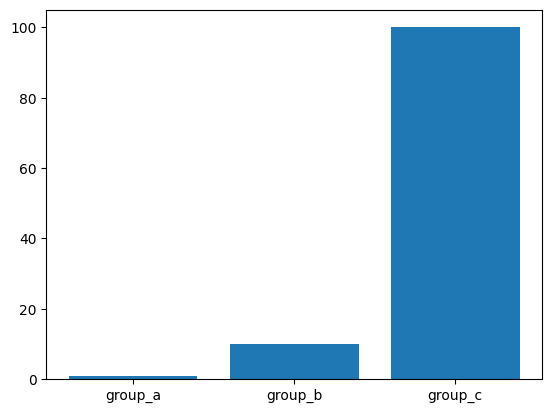

In [22]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]
plt.bar(names, values)
plt.show()

Задание 5.1

Выберите основные объекты в библиотеке Matplotlib при использовании объектно-ориентированного
режима:

Фигуры (холсты) и координатные плоскости

Задание 5.2

Соотнесите методы объекта axes и графики, которые они строят (при возникновении
затруднений обратитесь к документации).

axes.hist() Гистограмма
axes.bar() Столбчатая диаграмма
axes.plot() Линейный график
axes.scatter() Диаграмма рассеяния
axes.box() Коробчатая диаграмма



Задание 5.3

Соотнесите методы объекта axes и параметры, которые эти методы регулируют:

axes.set_title() Название графика
axes.set_xlabel() Название оси абсцисс
xes.xaxis.set_tick_params() Параметры отметок на оси абсцисс
axes.set_ylabel() Название оси ординат
axes.legend() Легенда
axes.grid() Сетка на графике


Задание 5.4

По какому параметру отличаются друг от друга представленные ниже графики?

bins

Задание 5.5

Дан код для отрисовки основной системы координат:

fig = plt.figure(figsize=(13, 4))

main_axes = fig.add_axes([0, 0, 1, 1])

Выберите правильный набор параметров, позволяющих разместить вспомогательную ось так, как
показано на заготовке графика ниже.

Подсказка (1 из 2): Из размещения главной и вспомогательной
систем координат ясно, что вспомогательная смещена на 20 % вверх
и на 20 % влево относительно главной.

Подсказка (2 из 2): Ширина и высота вспомогательной системы
координат занимает 60 % от ширины и высоты главной.

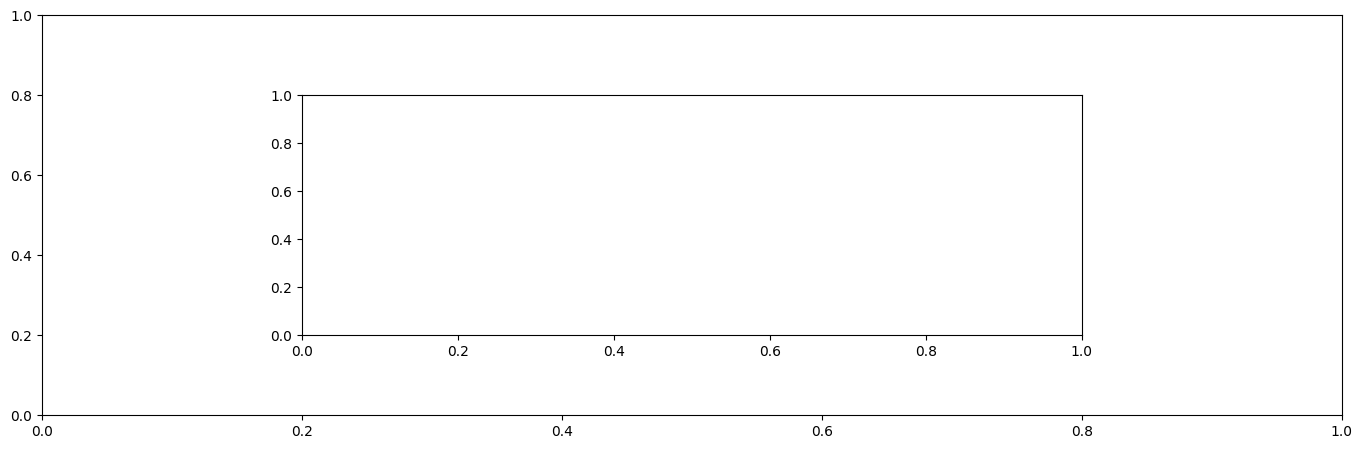

In [23]:
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
insert_axes = fig.add_axes([0.2, 0.2, 0.6, 0.6])

Задание 5.6

Выберите вариант кода, который позволит построить приведённый ниже график (посмотрите в
документации параметры объекта figure, которые позволяют раскрашивать части фигуры).
Подсказка (1 из 2): Чтобы построить такой график, необходимо

сгруппировать данные по датам и вычислить суммарное ежедневно
фиксируемое количество вакцинированных людей по всем странам.

Подсказка (2 из 2): Для раскрашивания обрамления фигуры
необходимо выставить значение параметра facecolor на 'lightgreen'
(светло-зелёный цвет). Параметр edgecolor отвечает за расцветку
внутреннего графика.

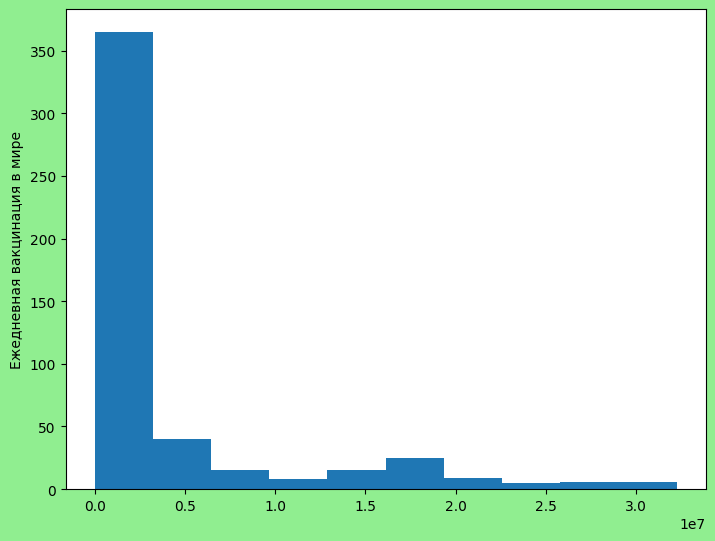

In [24]:
fig = plt.figure(facecolor='lightgreen')
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(covid_df.groupby('date')['daily_vaccinations'].sum())
axes.set_ylabel('Ежедневная вакцинация в мире');

Задание 5.7

Какое название лучше всего подойдёт графику, который строит код ниже?

Подсказка (1 из 1): Данные группируются по признаку страны, и
рассчитывается последнее значение общего числа сделанных
прививок в каждой стране. Далее выбираются пять стран, где
значение этого показателя наибольшее. На основе этих данных
строится столбчатая диаграмма.

ТОП-5 стран по общему числу сделанных прививок

<BarContainer object of 5 artists>

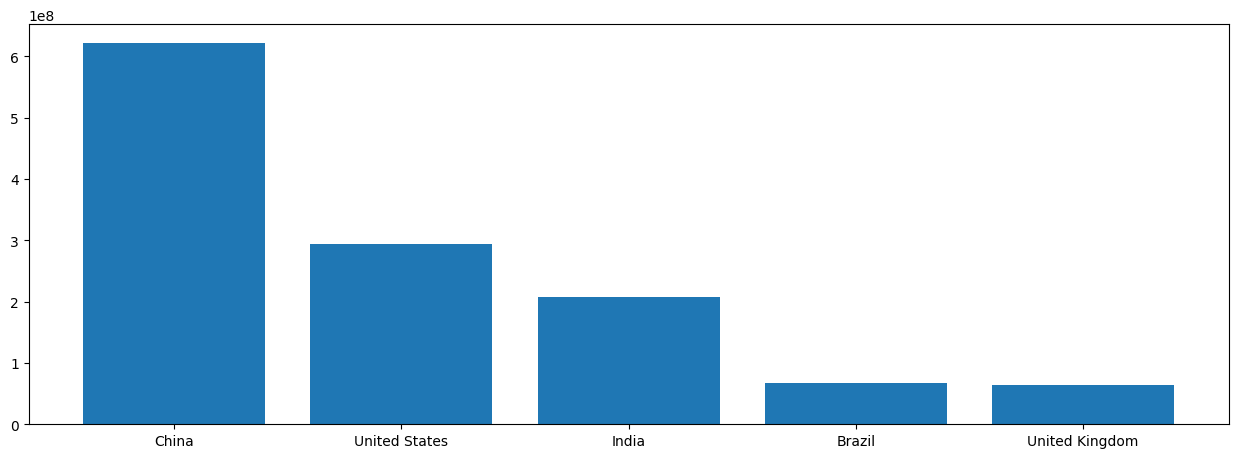

In [25]:
v = covid_df.groupby(['country'])['total_vaccinations'].last().nlargest(5)
fig = plt.figure(figsize=(12, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x=v.index,height=v)

Задание 5.8

Подумайте (или посмотрите в документации), по каким индексам надо обратиться к списку осей axes ,
полученному с помощью метода subplots() , чтобы построить такой график:

Подсказка (1 из 1): Метод subplots() возвращает фигуру и список из
координатных плоскостей. Если число строк или столбцов больше 1,
то возвращается вложенный список. По первому индексу происходит
обращение к строкам таблицы, по второму индексу — к столбцам.

axes[1][2]